In [2]:
#importamos librerias
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
#definimos la EDO y la solución exacta
def exact_sol(x0,y0,h,xmax):
    X = []
    Y = []
    x = x0
    y = y0
    while x <= xmax:
        X.append(x)
        y = 1/4*(2*x + 5*np.exp(-2*x) - 1)
        Y.append(y)
        x += h
    return [X,Y]

def g(x,y,alpha,beta):
    return x**alpha - 2*y**beta

In [22]:
#definimos el metodo runge kutta de quinto orden
def RK5_sol(g,x0,y0,h,xmax):
    X = []
    Y = []
    x = x0
    y = y0
    while x <= xmax:
        X.append(x)
        Y.append(y)
        k1 = g(x,y, alpha, beta)
        k2 = g(x + (1/4)*h, y  +  (1/4)*k1*h, alpha, beta) 
        k3 = g(x + (1/4)*h, y  +  (1/8)*k1*h  +  (1/8)*k2*h, alpha, beta)
        k4 = g(x + (1/2)*h, y                 -  (1/2)*k2*h  +         k3*h, alpha, beta)
        k5 = g(x + (3/4)*h, y  + (3/16)*k1*h                                 +  (9/16)*k4*h, alpha, beta)
        k6 = g(x + h,       y  -  (3/7)*k1*h  +  (2/7)*k2*h  +  (12/7)*k3*h  +  (12/7)*k4*h  +  (8/7)*k5*h, alpha, beta)
        y += (7*k1 + 32*k3 + 12*k4 + 32*k5 + 7*k6)*h/90
        x += h
    return [X,Y]

#definimos una función para 
def plot_graphic(X,Y, Y_exact):
    plt.plot(X,Y_exact, 'r', linewidth=2, label='exact')
    plt.plot(X,Y, 'k--', label='RK5')
    plt.title('Solution for $dy/dx+2y=x^2$ using RK5')
    plt.xlabel(r'$x$', size=20)
    plt.ylabel(r'$y$', size=20)
    plt.legend(loc='upper left')
    plt.savefig('EDO_by_RK5.pdf')
    plt.show()

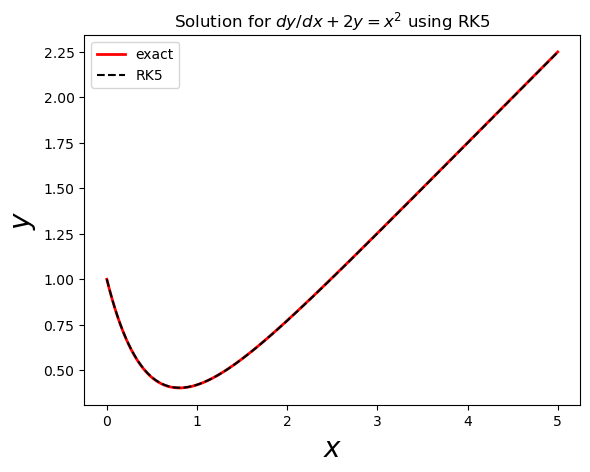

In [23]:
#llamamos las funciones
x0 = 0
y0 = 1
h = 0.01
xmax = 5
alpha = 1
beta = 1
sol = RK5_sol(g,x0,y0,h,xmax)
exact = exact_sol(x0,y0,h,xmax)
plot_graphic(sol[0],sol[1],exact[1])

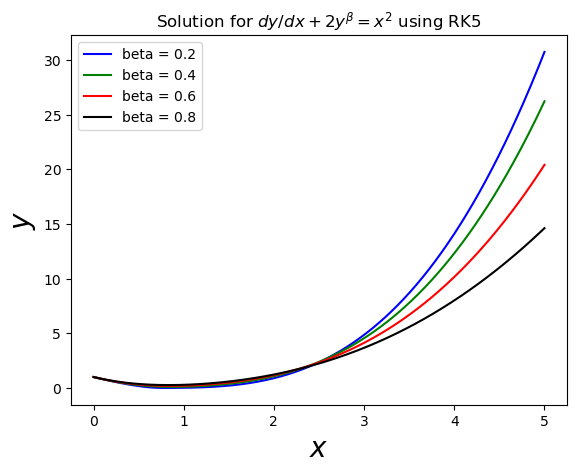

In [19]:
#llamamos las funciones
x0 = 0
y0 = 1
h = 0.01
xmax = 5
alpha = 2

# Definir una lista de colores
color = ['b', 'g', 'r', 'k']

# Graficar las curvas en un bucle for, variando el color
for i, beta in enumerate([0.2, 0.4, 0.6, 0.8]):
    sol = RK5_sol(g,x0,y0,h,xmax)
    plt.plot(sol[0],sol[1], f'{color[i]}', label=f'beta = {beta}')
plt.title('Solution for $dy/dx+2y^β=x^2$ using RK5')
plt.xlabel(r'$x$', size=20)
plt.ylabel(r'$y$', size=20)
plt.legend(loc='upper left')
plt.savefig('EDOalpha_by_RK5.pdf')
plt.show()